# Import

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
from random import randint as ran
#Pour avoir l'auto complétion:
%config IPCompleter.greedy=True  

# Fonction

In [2]:
#Permet de construire notre modèle
def model(X, theta):
    return X.dot(theta)

In [3]:
#notre belle fonction coût
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [4]:
#Fonction de la descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [5]:
#Retourne le gradient au point X
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [6]:
#Fonction qui calcule le coefficient de détermination
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

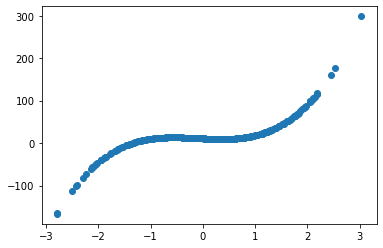

In [7]:
np.random.seed(1) # pour toujours reproduire le meme dataset
x, y = make_regression(n_samples=500, n_features=1, noise=10)
y=10*x**3+3*x**2-6*x-3 + ran(1,15)

plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée

In [8]:
print(x.shape)
print(y.shape)

# redimensionner y car sa taille est incomplète
y = y.reshape(y.shape[0], 1)

print(y.shape)

(500, 1)
(500, 1)
(500, 1)


In [9]:
#X = np.hstack((x, np.ones(x.shape)))#régression linéaire
X = np.hstack((x**3,x**2,x, np.ones(x.shape)))#régression polynomiale
print(X.shape)  #C'est juste que l'on créer le vecteur X de taille m*(n+1)

(500, 4)


In [10]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
#theta = np.random.randn(2, 1)#régression linéaire
theta = np.random.randn(4, 1)#régression polynomiale
theta

array([[1.76405235],
       [0.40015721],
       [0.97873798],
       [2.2408932 ]])

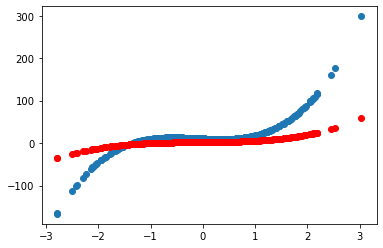

In [11]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

In [12]:
print(X.shape)
print(theta.shape)


(500, 4)
(4, 1)


In [13]:
cost_function(X, y, theta)

354.2338014943044

In [14]:
n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

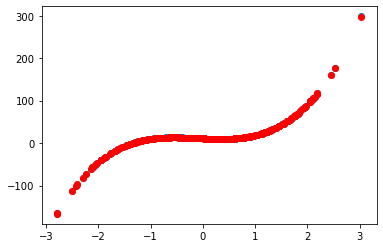

In [15]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)
# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')

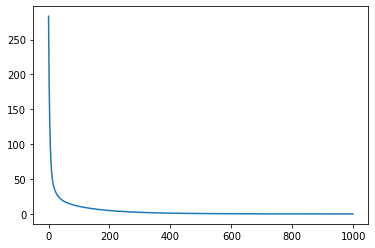

In [16]:
plt.plot(range(n_iterations), cost_history)

In [17]:
coef_determination(y, predictions)

0.9999536511114236

In [18]:
theta_final

array([[ 9.91568354],
       [ 3.00326415],
       [-5.64000214],
       [10.97113092]])

# Analyse polynomiale

In [19]:
#Permet de récupérer le dataset pour une année
def recupData(dataset, nomEntreprise, annee):
    test=dataset[dataset['Name'] == nomEntreprise]
    return test.loc[annee]['Daily_High']

In [20]:
data=pd.read_csv('preprocessed_CAC40.csv',index_col='Date',parse_dates=True)

In [22]:
test=recupData(data,'SAFRAN','2010')
#test = test.reshape(test.shape[0], 1)
print(test.shape)

(256,)
